

# Time series analysis of the daily page views for the Wikipedia

This project is a replication of the project on facebook. In this project I predicted the daily page views for the Wikipedia page for Peyton Manning for the next year by using facebook prophet. I made the analyses in kaggle.

A BRIEF INFORMATION ABOUT THE DATA
Source : https://facebook.github.io/prophet/docs/quick_start.html#python-api

"As an example, let’s look at a time series of the log daily page views for the Wikipedia page for Peyton Manning. We scraped this data using the Wikipediatrend package in R. Peyton Manning provides a nice example because it illustrates some of Prophet’s features, like multiple seasonality, changing growth rates, and the ability to model special days (such as Manning’s playoff and superbowl appearances)."

*** All below explanations were taken from https://facebook.github.io/prophet/docs/quick_start.html#python-api



In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/example-wp-log-peyton-manning/example_wp_log_peyton_manning.csv


#### Import stan and all necessary libraries

In [6]:
import pystan

In [7]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [8]:
df = pd.read_csv('../input/example-wp-log-peyton-manning/example_wp_log_peyton_manning.csv')

In [9]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [7]:
df.shape

(2905, 2)

In [10]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [10]:
df.head(14)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
y,2905.0,8.138958,0.845957,5.26269,7.5148,7.997999,8.580168,12.846747


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [14]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [11]:
m = Prophet()
m.fit(df)

In [12]:
m

In [13]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [14]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [15]:
future = m.make_future_dataframe(periods =365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213670,7.518816,8.928758
3266,2017-01-16,8.538673,7.788979,9.254873
3267,2017-01-17,8.326104,7.627356,9.075703
3268,2017-01-18,8.158756,7.426524,8.891585
3269,2017-01-19,8.170689,7.410278,8.869512


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

,ds,yhat,yhat_lower,yhat_upper
2905,2016-01-21,8.561274,7.911348,9.155692
2906,2016-01-22,8.577281,7.907100,9.222370
2907,2016-01-23,8.345999,7.686113,8.973150
2908,2016-01-24,8.714022,8.038182,9.302403
2909,2016-01-25,9.022737,8.390282,9.625878
...,...,...,...,...
3265,2017-01-15,8.213670,7.505424,8.919994
3266,2017-01-16,8.538673,7.775955,9.284450
3267,2017-01-17,8.326104,7.647892,9.055323
3268,2017-01-18,8.158756,7.461688,8.942001


In [26]:
next_year_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

In [27]:
next_year_forecast.to_csv('next_year_forecast_365')

In [28]:
pd.read_csv('next_year_forecast_365')

,Unnamed: 0,ds,yhat,yhat_lower,yhat_upper
0,2905,2016-01-21,8.561274,7.911348,9.155692
1,2906,2016-01-22,8.577281,7.907100,9.222370
2,2907,2016-01-23,8.345999,7.686113,8.973150
3,2908,2016-01-24,8.714022,8.038182,9.302403
4,2909,2016-01-25,9.022737,8.390282,9.625878
...,...,...,...,...,...
360,3265,2017-01-15,8.213670,7.505424,8.919994
361,3266,2017-01-16,8.538673,7.775955,9.284450
362,3267,2017-01-17,8.326104,7.647892,9.055323
363,3268,2017-01-18,8.158756,7.461688,8.942001


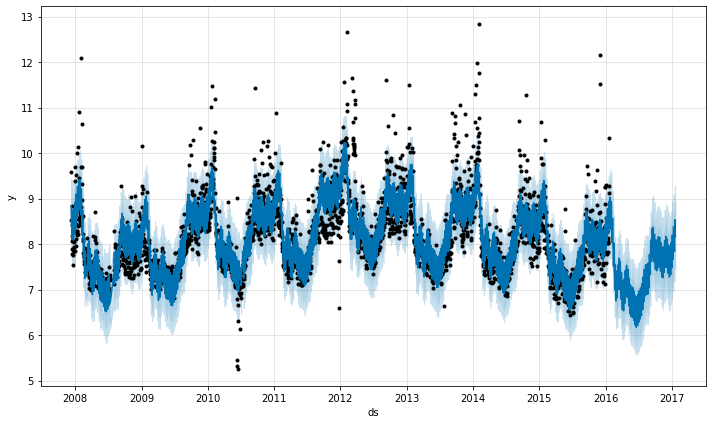

In [18]:
fig1 = m.plot(forecast)

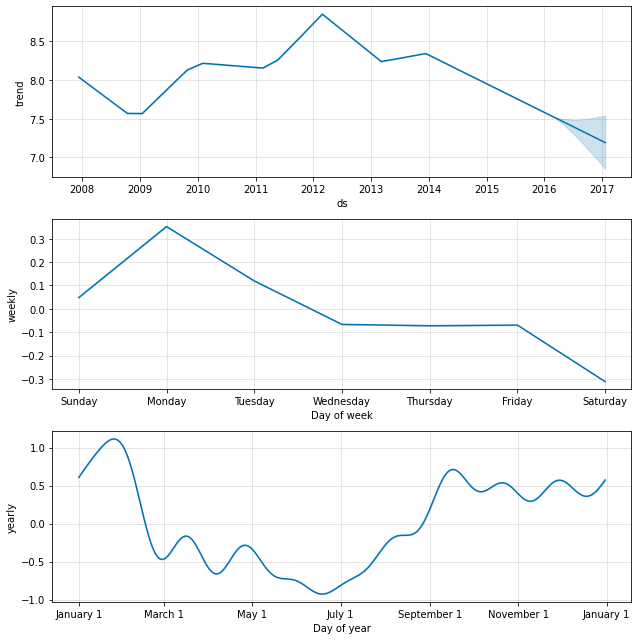

In [19]:
fig2 = m.plot_components(forecast)

In [24]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [25]:
plot_components_plotly(m, forecast)